# Kaggle - Don't Overfit! II

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


**Try to see if any feature stands out**

In [9]:
means_0 = np.zeros((300,3))
for i in range(300):
    means_0[i,0]= i
    means_0[i,1] = train[train['target']==0][str(i)].mean()
    means_0[i,2] = train[train['target']==0][str(i)].std()

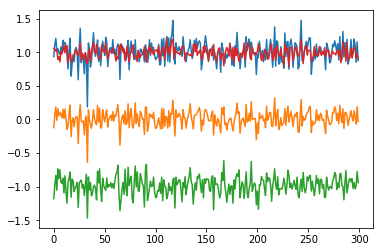

In [10]:
plt.plot(means_0[:,0],means_0[:,1]+means_0[:,2])
plt.plot(means_0[:,0],means_0[:,1])
plt.plot(means_0[:,0],means_0[:,1]-means_0[:,2])
plt.plot(means_0[:,0],means_0[:,2])

**It appears that the values themselves have a mean close to 0 and an stdev of 1, with no specific feature that stands out**

In [11]:
X = train.drop(['id','target'],axis=1)
y = train['target']

In [12]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

### Train test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Try simple dimentionality reduction and fitting a forest and Gboost**

In [14]:
pca = PCA(n_components=50)

In [15]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
X_new = pca.transform(X_train)
T_new = pca.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
forest = RandomForestClassifier(n_estimators=100)

In [19]:
forest.fit(X_new,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
forest.score(X_new,y_train)

1.0

**Acceptable for a first go**

In [21]:
forest.score(T_new,y_test)

0.72

In [22]:
Submit = test.drop('id',axis=1)

In [23]:
S_new = pca.transform(Submit)

In [24]:
pred = forest.predict_proba(S_new)

In [25]:
pred = pred[:,0]

In [26]:
ss = test['id']

In [27]:
result = pd.DataFrame(pred,index=ss)

In [28]:
result.to_csv('simple_forest.csv')

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
boost = GradientBoostingClassifier()

In [31]:
boost.fit(X_new,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [32]:
boost.score(X_new,y_train)

1.0

**Slightly better**

In [33]:
boost.score(T_new,y_test)

0.76

In [34]:
pred_boost = boost.predict_proba(S_new)

In [35]:
result = pd.DataFrame(pred_boost,index=ss)

In [36]:
result.to_csv('simple_gboost.csv')

**Performance on Kaggle was fairly poor (as expected with this simple thoughtless process) ~0.6 but it's a start**<br>
**I will perform more careful feature selection in another notebook**